In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1- Load the Data

In [ ]:
data_train=pd.read_csv('drive/My Drive/Manar BELMOUDDEN & Nidal BENHADDA/train_1.csv',decimal=',')
data_train.head()

Unnamed: 0  OBJECTID   CMM     CM  ... SIO2R_B Th_B     ORDRE OBS
0           1         1  CMM1  CM698  ...     0.0  0.0  5.998286   0
1           3         3  CMM3  CM705  ...     0.0  0.0  5.998286   0
2           6         6  CMM6  CM944  ...     0.0  0.0  5.998286   0
3           7         7  CMM1  CM698  ...     0.0  0.0  9.425878   0
4           9         9  CMM7  CM703  ...     0.0  0.0  9.425878   0

[5 rows x 50 columns]

In [ ]:
data_test= pd.read_csv('drive/My Drive/Manar BELMOUDDEN & Nidal BENHADDA/test_1.csv',decimal=',')
data_test.head()

Unnamed: 0  OBJECTID   CMM     CM  ... SIO2R_B Th_B     ORDRE OBS
0           2         2  CMM2  CM701  ...     0.0  0.0  5.998286   0
1           4         4  CMM4  CM939  ...     0.0  0.0  5.998286   0
2           5         5  CMM5  CM942  ...     0.0  0.0  5.998286   0
3           8         8  CMM2  CM701  ...     0.0  0.0  9.425878   0
4          11        11  CMM4  CM939  ...     0.0  0.0  9.425878   0

[5 rows x 49 columns]

# 2- Visualization

we plot distribution of dependent variables "BPL_B"

Skewness Co-efficient: -0.871


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


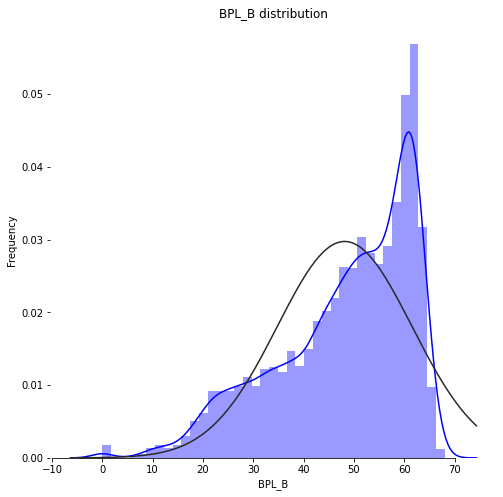

In [ ]:
##### GET SKEWNESS #####
#skewness coefficient is how much the distribution mean value is deviated 
#from the numerical mean value of the distribution 
print(f"Skewness Co-efficient: {round(data_train.BPL_B.skew(), 3)}")

##### data plot #####
fig, ax = plt.subplots(figsize=(8, 8))
from scipy import stats

sns.distplot(data_train['BPL_B'] ,fit=stats.norm,color="b")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BPL_B")
ax.set(title="BPL_B distribution")
sns.despine(trim=True, left=True)
plt.show()


In [ ]:
#We will apply log transformation to the feature to make the distribution close to gaussian.
from scipy.stats import skew, norm
# log(1+x) transform
data_train['BPL_B'] = np.log1p(data_train['BPL_B'])

##### GET SKEWNESS #####
print(f"Skewness Co-efficient: {round(data_train.BPL_B.skew(), 3)}")

# Get the fitted parameters used
(mu, sigma) = norm.fit(data_train['BPL_B'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

##### new data plot #####
fig, ax = plt.subplots(figsize=(8, 8))
from scipy import stats

sns.distplot(data_train['BPL_B'] ,fit=stats.norm, color="b")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BPL_B")
ax.set(title="BPL_B gaussian distribution")
sns.despine(trim=True, left=True)
plt.show()


Skewness Co-efficient: -3.646

 mu = 3.84 and sigma = 0.40



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


# 3- Data preprocessing

In [ ]:
#OBJECTID column
OBJECTID_col=pd.DataFrame(data_test['OBJECTID'], columns=['OBJECTID'])
OBJECTID_col

OBJECTID
0            2
1            4
2            5
3            8
4           11
...        ...
4589     15300
4590     15302
4591     15304
4592     15305
4593     15308

[4594 rows x 1 columns]

We tried to drop some columns to see the impact on the predistion, but we ended up using the whole features
Remove CM and CMM from data train and data test
```
data_train=data_train.drop(['CMM'], axis=1)
data_train=data_train.drop(['CM'], axis=1)
data_test=data_test.drop(['CMM'], axis=1)
data_test=data_test.drop(['CM'], axis=1)
```

In [ ]:
# Split data to features and labels
train_features = data_train.drop(['BPL_B'], axis=1)  #data train without BPL_B
train_labels = data_train['BPL_B'].reset_index(drop=True)  #BPL_B column from data train
test_features = data_test #testing data



Concatenating our train and test dataframes for the pupose of: 

*   to get more data for our analysis
*   applying the feature transformation pipeline to the entire dataset(get all the values for the use of one hot encoding, to get the same dataframe shape for data_train and data_test after splitting)
*   avoiding repeating all the operations








In [ ]:
all_data_features = pd.concat([train_features, test_features]).reset_index(drop=True)
#all_features.shape

In [ ]:
all_data_features

Unnamed: 0  OBJECTID      CMM      CM  ... SIO2R_B Th_B     ORDRE OBS
0               1         1     CMM1   CM698  ...     0.0  0.0  5.998286   0
1               3         3     CMM3   CM705  ...     0.0  0.0  5.998286   0
2               6         6     CMM6   CM944  ...     0.0  0.0  5.998286   0
3               7         7     CMM1   CM698  ...     0.0  0.0  9.425878   0
4               9         9     CMM7   CM703  ...     0.0  0.0  9.425878   0
...           ...       ...      ...     ...  ...     ...  ...       ...  ..
15305       15300     15300  CMM1824   CM977  ...     0.0  0.0  3.427592   0
15306       15302     15302  CMM1821  CM1423  ...     0.0  0.0  3.427592   0
15307       15304     15304  CMM1816  CM1644  ...     0.0  0.0  2.570694   0
15308       15305     15305  CMM1817  CM1684  ...     0.0  0.0  2.570694   0
15309       15308     15308  CMM1825  CM1145  ...     0.0  0.0  2.570694   0

[15310 rows x 49 columns]

In [ ]:
#apply One hot encoding for object type features
all_data_features = pd.get_dummies(all_data_features).reset_index(drop=True)
all_data_features

Unnamed: 0  OBJECTID  ...  OBS_#VALEUR!  OBS_0
0               1         1  ...             0      1
1               3         3  ...             0      1
2               6         6  ...             0      1
3               7         7  ...             0      1
4               9         9  ...             0      1
...           ...       ...  ...           ...    ...
15305       15300     15300  ...             0      1
15306       15302     15302  ...             0      1
15307       15304     15304  ...             0      1
15308       15305     15305  ...             0      1
15309       15308     15308  ...             0      1

[15310 rows x 3890 columns]

In [ ]:
#Missing values imputation

## Get the dataframe with all the features and SUM of the NaN values present
data_null_count = all_data_features.isnull().sum()
data_null_count

Unnamed: 0                      0
OBJECTID                        0
X                               0
Y                               0
Z                               0
                               ..
MINR_PASSANT_10mm               0
MINR_PASSANT_6,3 mm             0
MINR_PASSANT_6,3 mm et 10 mm    0
OBS_#VALEUR!                    0
OBS_0                           0
Length: 3890, dtype: int64

> Fill the missing values


Fill the missing values using MICE


```
from fancyimpute import IterativeImputer
col = all_data_features.columns
Mice_impute = IterativeImputer()
all_data_features = Mice_impute.fit_transform(all_data_features)
all_data_features = pd.DataFrame(all_data_features, columns=col)
```
we could have used MICE to fill the missing values but since the number of Zeros we fill by doesn't affect that much the predictions 

we used fillna(0)

In [ ]:
all_data_features= all_data_features.fillna(0)

In [ ]:
all_data_features.isnull().sum()

Unnamed: 0                      0
OBJECTID                        0
X                               0
Y                               0
Z                               0
                               ..
MINR_PASSANT_10mm               0
MINR_PASSANT_6,3 mm             0
MINR_PASSANT_6,3 mm et 10 mm    0
OBS_#VALEUR!                    0
OBS_0                           0
Length: 3890, dtype: int64

In [ ]:
all_data_features

Unnamed: 0  OBJECTID  ...  OBS_#VALEUR!  OBS_0
0               1         1  ...             0      1
1               3         3  ...             0      1
2               6         6  ...             0      1
3               7         7  ...             0      1
4               9         9  ...             0      1
...           ...       ...  ...           ...    ...
15305       15300     15300  ...             0      1
15306       15302     15302  ...             0      1
15307       15304     15304  ...             0      1
15308       15305     15305  ...             0      1
15309       15308     15308  ...             0      1

[15310 rows x 3890 columns]

In [ ]:
#slicing the subset of the data
X_trainin =  all_data_features.iloc[:len(data_train),:] #data train dataframe after preprocessing
y_trainin =  train_labels #BPL_B 
X_testin  =  all_data_features.iloc[len(data_train):,:] #data test dataframe after preprocessing

In [ ]:
#verification of subsets shapes
X_trainin.shape, X_testin.shape, y_trainin.shape

((10716, 3890), (4594, 3890), (10716,))



> Split dataset into training and test set



In [ ]:
#Split train to training and testing subsets 
import random
X_train, X_test, y_train, y_test = train_test_split(X_trainin, y_trainin,  test_size=0.2, random_state=0)

# 4- Build models: Random Forest, XgBoost, LightGBM




In [ ]:
#prepare the models libraries (Xg_boost, random forest, ...)
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [ ]:
# Introduce error metrics calculation functions
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Define validation
def cv_rmse(model, X_trainin):
    rmse = np.sqrt(-cross_val_score(model, X_trainin, y_trainin, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

Hyperparameters Tuning: get the Best Hyparameters of the 3 models


In [ ]:
# Import GridSearchCV of Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()

rf = RandomForestRegressor()
n_estimators = [350 ,400, 450, 500, 550, 600]
max_depth = [i for i in range (5,20)]

params_dtr = {
'n_estimators': n_estimators,
'max_depth': max_depth,
}

grid_dtr = GridSearchCV(estimator=rf,param_grid=params_dtr, scoring='r2', cv=2, n_jobs=-1)

# Fit 'grid_dtr' to the training data
grid_dtr.fit(X_train, y_train)

best_hyperparams = grid_dtr.best_params_
print('Best hyperparameters of Random Forest:',best_hyperparams)

In [ ]:
#Using GridSearchCV for XgBoost Regressor
xg_reg = xgb.XGBRegressor()
parameters = {'learning_rate': [0.1,0.2,0.3,0.4],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,300,400, 500],
              'max_depth'    : [4,6,8,10],
              'colsample_bytree'    : [0.9, 0.6, 0.3, 0.1],
              'min_child_weight' = [i for i in range (1,5)]
             }

grid_xgb = GridSearchCV(estimator=xg_reg, param_grid = parameters, cv = 2, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Results from Grid Search
print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n", grid_xgb.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_xgb.best_params_)

In [ ]:
#Using GridSearchCV for LGBM Regressor 
LGBM = lgb.LGBMRegressor()
parameters = {'learning_rate': [0.1,0.2,0.3,0.4],
              'feature_fraction'    : [0.95, 0.55, 0.25, 0.15],
              'n_estimators' : [100,350,450, 550],
              'bagging_freq' = [i for i in range (1,10)]
             }

grid_lgbm = GridSearchCV(estimator=LGBM, param_grid = parameters, cv = 2, n_jobs=-1)
grid_lgbm.fit(X_train, y_train)

# Results from Grid Search
print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n", grid_xgb.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_xgb.best_params_)

In [ ]:
#random forest
rf = RandomForestRegressor(n_estimators = 500, max_depth = 8, random_state = 21)


In [ ]:
#XG boost
xg_reg = xgb.XGBRegressor( objective ='reg:squarederror', min_child_weight=1,colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 7, alpha = 10, n_estimators = 500,booster= 'gbtree',nthread=4,seed=45,subsample=0.8)

In [ ]:
# LGBM regressor 
LGBM = lgb.LGBMRegressor(objective='regression',learning_rate=0.1, n_estimators=520, bagging_freq = 5, feature_fraction = 0.23)

In [ ]:
#cross validation
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
# RandomForest validation
score = cv_rmse(rf, X_trainin)
print("rf score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

rf score: 0.0865 (0.0100)


In [ ]:
# XgBoost validation
score = cv_rmse(xg_reg, X_trainin)
print("xg_reg score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

xg_reg score: 0.0842 (0.0086)


In [ ]:
# LGBM validation
score = cv_rmse(LGBM, X_trainin)
print('LGBM score: {:.4f} ({:.4f})'.format(score.mean(), score.std()))

LGBM score: 0.0846 (0.0072)




> fit models



In [ ]:
print('random forest Model')
rf_model_full_data = rf.fit(X_train, y_train)

random forest Model


In [ ]:
print('xgboost Model')
xgb_model_full_data = xg_reg.fit(X_train, y_train)

xgboost Model


In [ ]:
 print('LGBM Model')
lgbm_model_full_data = LGBM.fit(X_train, y_train)

LGBM Model


# a_ XGBoost Model


In [ ]:
# Mean Square Error Validation
xgb_score = rmsle(y_trainin, xgb_model_full_data.predict(X_trainin))
scores['xgb'] = (xgb_score, 0)
print(' RMSLE score on train data:')
print(xgb_score)

 RMSLE score on train data:
0.04899293469808883


In [ ]:
y_predicted_xgb=xgb_model_full_data.predict(X_trainin)
df_xgb = pd.DataFrame({'OBJECTID': data_train.OBJECTID, 'BPL_B pred_xgb': np.exp(y_predicted_xgb)-1, 'BPL_B real' : np.exp(data_train.BPL_B)-1})
mse = mean_squared_error(np.exp(y_predicted_xgb)-1, np.exp(data_train.BPL_B)-1)
rmse = math.sqrt(mse)
print(rmse)
print(df_xgb)

2.0219458322287527
       OBJECTID  BPL_B pred_xgb  BPL_B real
0             1       57.051044   57.823479
1             3       50.148365   49.700086
2             6       43.235954   44.027421
3             7       46.390194   46.580977
4             9       53.876389   51.285347
...         ...             ...         ...
10711     15303       39.299129   39.794344
10712     15306       54.925835   53.701799
10713     15307       57.764973   59.554413
10714     15309       60.990952   61.928021
10715     15310       63.044243   60.582691

[10716 rows x 3 columns]


In [ ]:
#apply on testing subset
y_test_pred_xgb = xgb_model_full_data.predict(X_test)
MSE = mean_squared_error(np.exp(y_test_pred_xgb)-1, np.exp(y_test)-1)
print('xgb MSE:',MSE)
print('xgb RMSE:',math.sqrt(MSE))

xgb MSE: 9.819778715723933
xgb RMSE: 3.1336526156745474


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(xgb_model_full_data.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(xgb_model_full_data.score(X_test, y_test)))

Training set score: 0.9915
Test set score: 0.9588


The training and test set accuracy are quite comparable. 
So, there isn't overfitting in XgBoost model.

In [ ]:
data_testID= pd.read_csv('drive/My Drive/Manar BELMOUDDEN & Nidal BENHADDA/test_1.csv',decimal=',')
# Apply on testing features
BPL_B_predicted = xgb_model_full_data.predict(X_testin)
df_xgb= pd.DataFrame({'OBJECTID':data_testID.OBJECTID, 'BPL_B':np.exp(BPL_B_predicted)-1})
df_xgb

OBJECTID      BPL_B
0            2  42.505451
1            4  46.782394
2            5  41.343342
3            8  55.072189
4           11  46.311768
...        ...        ...
4589     15300  54.195763
4590     15302  40.007595
4591     15304  51.011795
4592     15305  59.966084
4593     15308  57.992126

[4594 rows x 2 columns]

In [ ]:
df_xgb.to_csv(r'drive/My Drive/Manar BELMOUDDEN & Nidal BENHADDA/xgb cross.csv', index = False)

# b_ Random forest Model






> Decision tree regressor of Random Forest



Now, we select one tree from Random Forest implementation

In [ ]:
# Limit depth of tree to 10 levels
import graphviz

rf_small = RandomForestRegressor(n_estimators = 500, random_state = 21, max_depth = 8, max_leaf_nodes= 20)

rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
graphviz.Source(export_graphviz(tree_small, feature_names=all_data_features.columns, rounded = True, precision = 1))

we conclude that our estimate for the maximum CO2_B is 3.8 degrees as indicated by the value in the leaf node. An interesting observation is that in the root node,
there are 5373 samples with mean squared error = 0.2

Visualizing the tree, we now know the important information in the data to make prediction.



> Make prediction



In [ ]:
#Mean square error validation
rf_score = rmsle(y_trainin, rf_model_full_data.predict(X_trainin))
scores['rf'] = (rf_score, 0)
print(' RMSLE score on train data:')
print(rf_score)

 RMSLE score on train data:
0.047314932591166814


In [ ]:
y_predicted_rf=rf_model_full_data.predict(X_trainin)
df = pd.DataFrame({'OBJECTID': data_train.OBJECTID, 'BPL_B pred_rf': np.exp(y_predicted_rf)-1, 'BPL_B real' : np.exp(data_train.BPL_B)-1})
mse = mean_squared_error(np.exp(y_predicted_rf)-1, np.exp(data_train.BPL_B)-1)
rmse = math.sqrt(mse)
print(rmse)

1.744830484385856


In [ ]:
#apply on testing subset
y_test_pred_rf = rf_model_full_data.predict(X_test)
MSE = mean_squared_error(np.exp(y_test_pred_rf)-1, np.exp(y_test)-1)
print('rf MSE:',MSE)
print('rf RMSE:',math.sqrt(MSE))

rf MSE: 9.846191913001308
rf RMSE: 3.13786422794252


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf_model_full_data.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_model_full_data.score(X_test, y_test)))

Training set score: 0.9535
Test set score: 0.9419


The training and test set accuracy are quite comparable. 
So, there isn't overfitting in Random Forest model.

In [ ]:
data_testID= pd.read_csv('drive/My Drive/Manar BELMOUDDEN & Nidal BENHADDA/test_1.csv',decimal=',')
# aplly on testing features
BPL_B_predicted = rf_model_full_data.predict(X_testin)
df_rf= pd.DataFrame({'OBJECTID':data_testID.OBJECTID, 'BPL_B':np.exp(BPL_B_predicted)-1})
df_rf

OBJECTID      BPL_B
0            2  43.257799
1            4  47.143686
2            5  42.930391
3            8  56.094757
4           11  45.355810
...        ...        ...
4589     15300  53.270921
4590     15302  40.186554
4591     15304  47.822453
4592     15305  57.392464
4593     15308  54.872991

[4594 rows x 2 columns]

In [ ]:
df_rf.to_csv(r'drive/My Drive/Manar BELMOUDDEN & Nidal BENHADDA/Random Cross.csv', index = False)

# c_ Light GBM Model


To get a faster training speed with higher efficiency and a better accuracy, we use LGBM regressor algorithm.

In [ ]:
# Mean Square Error Validation
LGBM_score = rmsle(y_trainin, lgbm_model_full_data.predict(X_trainin))
scores['LGBM'] = (LGBM_score, 0)
print(' RMSLE score on train data:')
print(LGBM_score)


 RMSLE score on train data:
0.05651345809489676


In [ ]:
y_predicted_LGBM = lgbm_model_full_data.predict(X_trainin)
df = pd.DataFrame({'OBJECTID': data_train.OBJECTID, 'BPL_B pred_rf': np.exp(y_predicted_LGBM)-1, 'BPL_B real' : np.exp(data_train.BPL_B)-1})
mse = mean_squared_error(np.exp(y_predicted_LGBM)-1, np.exp(data_train.BPL_B)-1)
rmse = math.sqrt(mse)
print(rmse)

2.216574717743631


In [ ]:
#apply on testing subset
y_test_pred_LGBM = LGBM.predict(X_test)
MSE = mean_squared_error(np.exp(y_test_pred_LGBM)-1, np.exp(y_test)-1)
print('LGBM MSE:',MSE)
print('LGBM RMSE:',math.sqrt(MSE))

LGBM MSE: 10.271735708163968
LGBM RMSE: 3.204954868350562


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(lgbm_model_full_data.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lgbm_model_full_data.score(X_test, y_test)))

Training set score: 0.9861
Test set score: 0.9550


The training and test set accuracy are quite comparable. 
So, there isn't overfitting in LGBM model.

In [ ]:
# Submission LGBM
data_testID= pd.read_csv('drive/My Drive/Manar BELMOUDDEN & Nidal BENHADDA/test_1.csv',decimal=',')
# apply on testing features
BPL_B_predicted = lgbm_model_full_data.predict(X_testin)
df= pd.DataFrame({'OBJECTID':data_testID.OBJECTID, 'BPL_B':np.exp(BPL_B_predicted)-1})

df.to_csv(r'drive/My Drive/Manar BELMOUDDEN & Nidal BENHADDA/LGBM.csv', index = False)

#d_ Blended learning

Combine three Models: LGBM,Random Forest, xgboost

The idea of combining models seems to be 
advantageous in order to make the final predictions more robust and prevent overfitting and underfitting


In [ ]:
def blended_predictions(X_trainin):
  return(0.33* xgb_model_full_data.predict(X_trainin))+(0.34 * rf_model_full_data.predict(X_trainin))+( 0.33* lgbm_model_full_data.predict(X_trainin))

In [ ]:
# Mean Square Error Validation
scores = {}
blended_score = rmsle(y_trainin, blended_predictions(X_trainin))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)


RMSLE score on train data:
0.04709260425303851


In [ ]:
from sklearn.metrics import mean_squared_error
import math
y_predicted = blended_predictions(X_trainin)
df = pd.DataFrame({'OBJECTID':data_train.OBJECTID,'BPL_B pred':np.exp(y_predicted)-1, 'BPL_B real': np.exp(data_train.BPL_B)-1})
mse = mean_squared_error(np.exp(y_predicted)-1, np.exp(data_train.BPL_B)-1)
rmse = math.sqrt(mse)
print(rmse)


1.8376545090590328


In [ ]:
y_test_pred = blended_predictions(X_test)
y_test_pred.shape

(2144,)

In [ ]:
y_test.shape

(2144,)

In [ ]:
#apply on testing subset
y_test_pred = blended_predictions(X_test)
MSE = mean_squared_error(np.exp(y_test_pred)-1, np.exp(y_test)-1)
print('blending MSE:',MSE)
print('blending RMSE:',math.sqrt(MSE))

blending MSE: 9.821014223294219
blending RMSE: 3.1338497448496505


In [ ]:
# Blended Submission
data_testID= pd.read_csv('drive/My Drive/Manar BELMOUDDEN & Nidal BENHADDA/test_1.csv',decimal=',')
#apply on testing features 
BPL_B_predicted = blended_predictions(X_testin)
df_blend = pd.DataFrame({'OBJECTID':data_testID.OBJECTID, 'BPL_B':np.exp(BPL_B_predicted)-1})
df_blend


OBJECTID      BPL_B
0            2  41.809667
1            4  46.565855
2            5  41.981900
3            8  55.885905
4           11  44.889243
...        ...        ...
4589     15300  53.643070
4590     15302  40.951019
4591     15304  49.552190
4592     15305  58.190051
4593     15308  54.309985

[4594 rows x 2 columns]

In [ ]:
df_blend.to_csv(r'drive/My Drive/Manar BELMOUDDEN & Nidal BENHADDA/blend 0,34 RF.csv', index = False)



> Conclusion :



The comparison between the model's predictions separated (xgboost, random forest and light gbm) and the blended model shows that the accuracy of combined predictions is higher than the separated one. Which makes it the highest score submission we can have. 
We note that we tried to change the coefficients of the participation of each model in the blended predictions and we kept the best ones in term of accuracy and RMSE result.